# Chapter 6: Convolutional Neural Networks

(by Miguel Tomás : mtpsilva@gmail.com)

Deep Learning is becoming a very popular subset of machine learning due to his high performance results achieved on a wide range of datasets types. One known way to use this ML technique in particular, is to classify images and photos. The algorithm is known as Convolutional Neural Network (CNN) and is available on the Keras library in Python with all its simplicity for building neural networks.
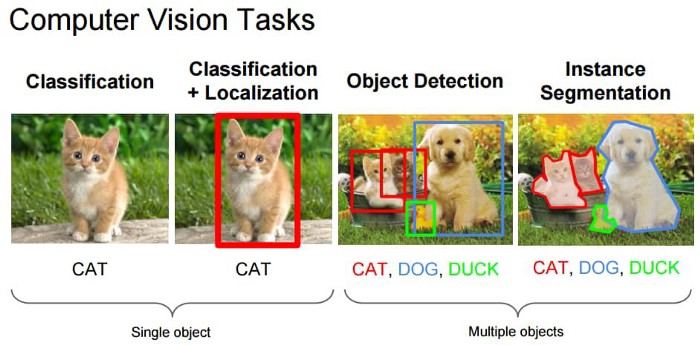

The computer uses pixels to view images. The pixels in an image are usually related. For example, a certain set of pixels can represent edges in an image or some other pattern. Convolution Neural Networks can be used to help identify patterns, objects and even people in images and photos.

Convolution multiplies the pixel matrix with the filter matrix or “kernel” and then adds the multiplied values. Then, the process of convolution slides to the next pixel and repeats the same process until all image pixels are covered. This process is shown further bellow.

The purpose of computer vision is to enable machines, computers or programs to observe the world like humans and apply knowledge to specific tasks, such as image and video recognition and image classification. With the development of deep learning algorithms (more specifically, convolutional neural networks), this has become possible nowadays. And affordable to everyone.

The architecture of the Convolutional networks are the connectivity pattern of neurons in the animal brain, and are inspired by biological processes, the connectivity pattern between neurons resembles the organization of the animal visual cortex.
Convolutional neural networks have the ability to capture spatial and temporal correlations in input images by applying correlation filters. Due to the reduced number of parameters involved and the reusability of weights, it performs better on image data sets.

## 1. How does it work?
Convolutional neural networks (CNNs) do not view images like we humans. We treat the image as a flat canvas with colors. We may not care about the width and height of the image, but we can perceive these parameters.
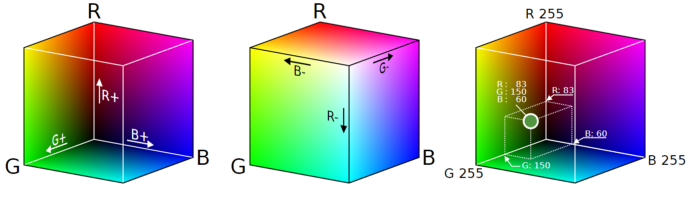

However, CNNs will view the image into different three-dimensional objects, such as three-dimensional objects where the three-dimensions are the color coding (or color channel), mainly red, green and blue (RGB), when combined, produce the colors we see.
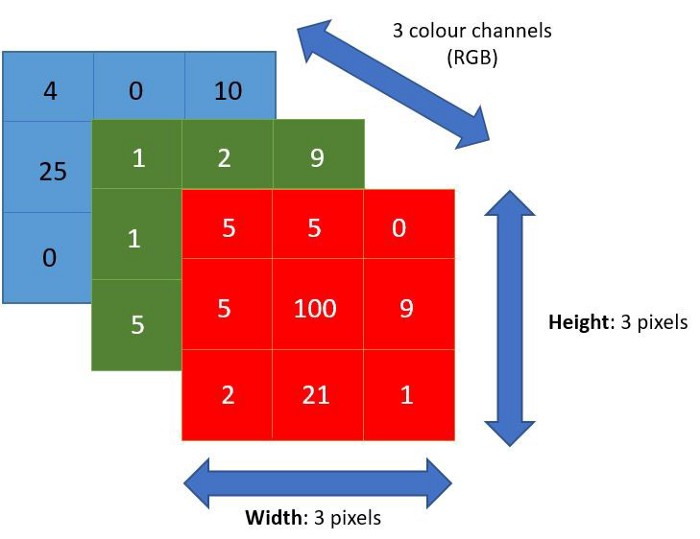

The first key point on implementing a CNN is to accurately measure each dimension of an image, because it will become the basis of linear algebra operations for processing images.
Figure  demonstrates how CNN works on RGB images. Each layer represents a RGB color , and numbers represent intensity (between 0 and 255).

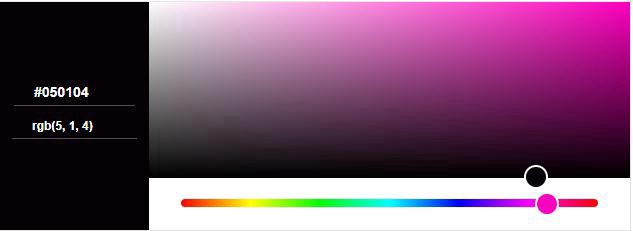

If we use the upper left pixel RGB (5, 1, 4) as seen on figure 4, our eyes will see the color lavender.
Now imagine a digital picture. For instance, a 7-megapixel camera can produce 3072 x 2304 pixel resolution of a photograph. How much calculations are require no analysis this image using a CNN ?

The convolutional neural network will discover which of those pixels are valid signals by simplifying the image into a form that is easy to process and without loss of features, it does so to help on classification of the image more accurately. This is another important concept to keep in mind when designing a CNN architecture. The architecture is not only good at learning functions, but also scalable to massive image data sets.

## 2. Convolutional Neural Network Layers
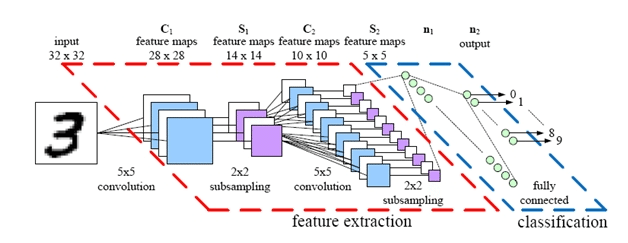

There are several main layers implemented in CNNs.

### Conv2D layer
It is a two-dimensional convolutional layer, mainly used as a layer for extracting features from the original input image. The first layer is responsible for capturing low-level features, such as edges, colors, and gradient directions. By adding layers, the architecture will try to capture advanced features.
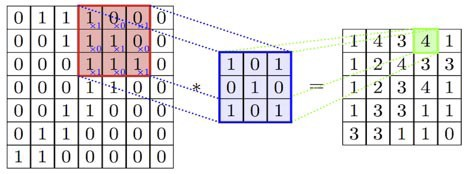

The CNN filter extends through the three channels (red, green and blue) in the image. The filter for each channel may also be different.

The red area shows the area calculated by the current filter, which is called the receiving field. The numbers in the filter are called weights or parameters. The filter slides (or convolving) around the image, calculates element-wise multiplication and fills the input into the output, which is called the activation map (or feature map).

We can have multiple convolutional layers to identify and capture advanced features, however this requires more computing power.

### Pooling layer
The next layer after the convolutional layer is the pooling layer (or downsampling or subsampling layer). The activation map is fed to the downsampling layer, which will apply one patch at a time a pooling layer.

The pooling layer gradually reduces the size of the space represented. Therefore, it reduces the number of parameters and the amount of calculations in the network.

The convergence layer also aims to control overfitting.

image.png


There are two main types of pooling layers: maximum pooling returns the maximum value of a specific pool size (2×2), and average pooling returns the average of all values of a specific pool size, as shown in Figure .

The maximum pool acts as a noise suppressor, and the average pool acts as a noise reduction mechanism to perform dimensionality reduction. Therefore, the performance of maximum pooling is much better than average pooling and is the most common pooling layer.

After the maximum pooling layer above, the CNN model is capable to understand the image function. In the next part, we feed it to a fully connected neural network for classification tasks.
However, before the output of the pooling layer is provided to the fully connected layer, we need an intermediate layer to convert the data dimension used for classification tasks in the Flatten layer.

### Flatten Layer
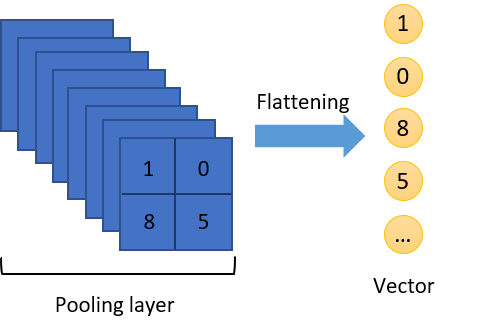

As mentioned earlier and the name suggests, this layer will flatten/convert the multidimensional array into a single long continuous linear vector. In more professional terms, it destroys the spatial structure of the data and converts a multi-dimensional tensor into a one-dimensional tensor, thus becoming a vector.

### Dense / Fully connected Layer
Each neuron receives input from all neurons in the upper layer and is therefore tightly connected. This layer has a weight matrix 𝑊, a bias vector 𝛽 and the activation of the previous layer. An example can be seen from Figure 10.

Dense implements the operation of:
output = activation(dot(input, kernel) + bias) 

### Dropout
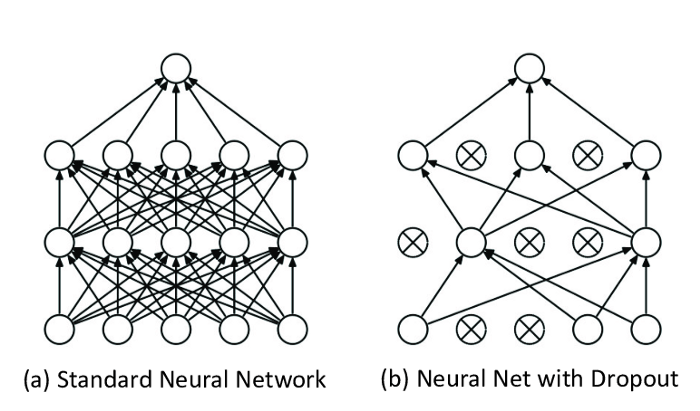

In fact, dropout is a regularization method. During the training process, the number of outputs of some layers is randomly ignored (exit, switch). This implementation will have the effect of making each layer be treated as a different layer with a different number of nodes and connectivity to the previous layer.

In convolutional networks, dropout is usually applied in fully connected layers rather than convolutional layers.

## 3. Build a Model using Keras
After setting your python environment, you should be able to import the keras package:

In [1]:
import tensorflow.keras
tensorflow.keras.__version__

'2.4.0'

## 4. Preparing the Data

Before we start, we normalise the image pixel values ​​from [0, 255] to [0, 1] to make our network easier to train (a smaller centering value usually gives better results). We will also adjust the shape of each image from (28, 28) to (28, 28, 1) because Keras requires three-dimensional dimensions.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


## 5. Building the Model

Each Keras model is either built using Sequential classes that represent a linear layer stack, or built using customizable functional Model classes. We will use a simpler sequential model because our CNN will be a linear layer stack.

We start by instantiating a Sequential model:

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


The Sequential constructor takes an array of Keras Layers. We’ll use 3 types of layers for our CNN: Convolutional, Max Pooling, and Softmax.

In [4]:

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


* num_filters, filter_size, and pool_size are self-explanatory variables that set the hyperparameters for our CNN.
* The first layer in any Sequential model must specify the input_shape, so we do so on Conv2D. Once this input shape is specified, Keras will automatically infer the shapes of inputs for later layers.
*  The output Softmax layer has 10 nodes, one for each class.

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

To see a model summary of what has been coded so far, one can include the next line of code and in turn is displayed a summary table with all the values coded.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

## 6. Compiling and fitting the Model

Before starting the training, we need to configure the training process. We identify 3 key factors in the compilation step:

* The optimizer. We will keep a very good default value: an optimizer based on Adam gradient. Keras also provides many other optimizers.
* The loss function. Since we are using the Softmax output layer, we will use cross entropy loss. Keras distinguishes binary_crossentropy (2 classes) and categorical_crossentropy (> 2 classes), so we will use the latter. See all Keras losses.
* A list of metrics. Since this is a classification problem, we only need Keras to report accuracy metrics.

Next is needed to specify some parameters before starting the fitting of the model. There are many possible parameters, but we will only provide these parameters:
* The training data (images and labels), commonly known as X and Y, respectively.
* The number of epochs (iterations over the entire dataset) to train for.
* The batach size (number of samples processed before the model is updated)

Calling model.evaluate()evaluates the output of a given input, then calculates the indicator function specified in model.compile based on train_images and train_labels, and returns the calculated indicator value as output.

We must pay attention to one thing: Keras expects the training target to be a 10-dimensional vector, because there are 10 nodes in our Softmax output layer.

The compilation looks like this:

In [7]:
batch_size = 100
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

Epoch 1/5
600/600 [==============================] - 49s 81ms/step - loss: 0.9142 - accuracy: 0.7685
Epoch 2/5
600/600 [==============================] - 47s 78ms/step - loss: 0.2650 - accuracy: 0.9224
Epoch 3/5
600/600 [==============================] - 47s 78ms/step - loss: 0.1885 - accuracy: 0.9444
Epoch 4/5
600/600 [==============================] - 46s 77ms/step - loss: 0.1497 - accuracy: 0.9563
Epoch 5/5
600/600 [==============================] - 48s 80ms/step - loss: 0.1258 - accuracy: 0.9628


## 7. Evaluating the Model

Evaluating a model from Keras actually only involves calling the fucntionevaluate(). The model.evaluate function

* The validation data (or test data), which is used during training to periodically measure the performance of the network based on data that has never been seen before

The evaluation results are retrieved form the variables assigned to the function evaluate().


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.1027 - accuracy: 0.9692
Test loss: 0.10267603397369385
Test accuracy: 0.9692000150680542
